# Notebook de acompañamiento al libro  

Creamos un ejemplo simple.

In [26]:
import numpy

datos = numpy.concatenate((numpy.random.randn(100,2)+2,numpy.random.randn(100,2)-2),axis=0)
etiquetas = numpy.concatenate((numpy.ones((100,1)),-numpy.ones((100,1))),axis=0)

In [27]:
etiquetas.shape

(200, 1)

Visualizamos.

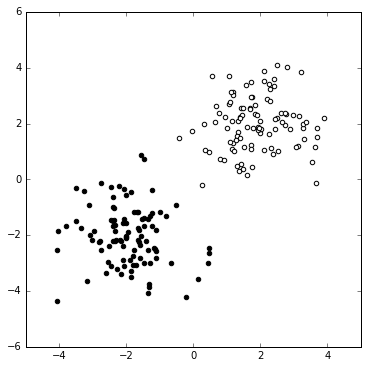

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(datos[:100,0],datos[:100,1],c=[1,1,1])
plt.scatter(datos[100:,0],datos[100:,1],c=[0,0,0])
plt.gcf().set_size_inches((6,6))

In [29]:
import numpy #importamos la librería numérica
T = 1000  #numero de pasos que se van a dar
learning_rate = 0.00001 #coeficiente que escala el gradiente

w = numpy.zeros((datos.shape[1],1)) #valor inicial de los parámetros que buscamos
print w.shape, datos.shape
for i in xrange(T): #descenso del gradiente por iteraciones
   gradient = -2*numpy.dot(datos.transpose(),(etiquetas-numpy.dot(datos,w)))
   w = w - learning_rate * gradient

(2, 1) (200, 2)


In [30]:
print 'El valor de los pesos es: ' + str(w)

El valor de los pesos es: [[ 0.24620132]
 [ 0.21317866]]


Vamos a visualizar ahora la frontera de decisión

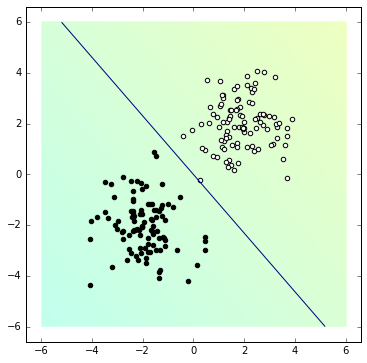

In [31]:
X,Y = numpy.meshgrid(numpy.linspace(-6,6,200),numpy.linspace(-6,6,200))
test = numpy.c_[X.ravel(),Y.ravel()]
pred=numpy.dot(test,w)

rp=pred.reshape(200,200)
plt.scatter(datos[:100,0],datos[:100,1],c=[1,1,1])
plt.scatter(datos[100:,0],datos[100:,1],c=[0,0,0])
plt.imshow(rp, interpolation='bilinear', origin='lower', extent=(-6,6,-6,6),alpha=0.3, vmin=-15, vmax=15)
plt.contour(X,Y,rp,[0], linestyle='dashed')
plt.gcf().set_size_inches((6,6))

Esta es una versión simplificada del algoritmo pues no tenemos en cuenta el valor del sesgo (para que sea más fácil de seguir el código). Esto significa que la solución siempre pasa por el punto (0,0). Veamos como si cambio el ejemplo no funciona. Simplemente voy a desplazar el problema pero como la solución pasa por (0,0) no se solucionará.

In [32]:
import numpy

datos = numpy.concatenate((numpy.random.randn(100,2),numpy.random.randn(100,2)+4),axis=0)
etiquetas = numpy.concatenate((numpy.ones((100,1)),-numpy.ones((100,1))),axis=0)

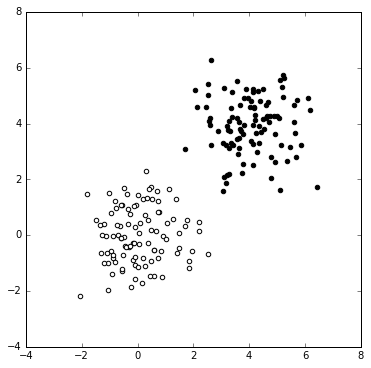

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(datos[:100,0],datos[:100,1],c=[1,1,1])
plt.scatter(datos[100:,0],datos[100:,1],c=[0,0,0])
plt.gcf().set_size_inches((6,6))

In [34]:
import numpy #importamos la librería numérica
T = 1000  #numero de pasos que se van a dar
learning_rate = 0.00001 #coeficiente que escala el gradiente

w = numpy.zeros((datos.shape[1],1)) #valor inicial de los parámetros que buscamos
print w.shape, datos.shape
for i in xrange(T): #descenso del gradiente por iteraciones
   gradient = -2*numpy.dot(datos.transpose(),(etiquetas-numpy.dot(datos,w)))
   w = w - learning_rate * gradient

(2, 1) (200, 2)


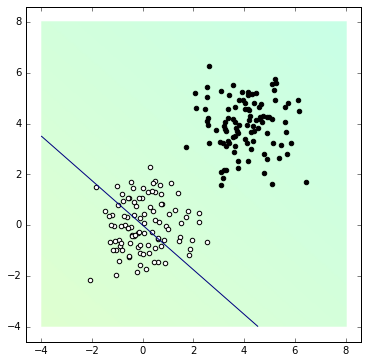

In [35]:
X,Y = numpy.meshgrid(numpy.linspace(-4,8,200),numpy.linspace(-4,8,200))
test = numpy.c_[X.ravel(),Y.ravel()]
pred=numpy.dot(test,w)

rp=pred.reshape(200,200)
plt.scatter(datos[:100,0],datos[:100,1],c=[1,1,1])
plt.scatter(datos[100:,0],datos[100:,1],c=[0,0,0])
plt.imshow(rp, interpolation='bilinear', origin='lower', extent=(-4,8,-4,8),alpha=0.3, vmin=-15, vmax=15)
plt.contour(X,Y,rp,[0], linestyle='dashed')
plt.gcf().set_size_inches((6,6))

El resultado es el esperado. Vamos a cambiar ligeramente el código anterior añadiendo una sola línea más que resolverá el problema. 

In [36]:
import numpy as np #importamos la librería numérica
T = 1000  #numero de pasos que se van a dar
learning_rate = 0.0001 #coeficiente que escala el gradiente
datos_aumentados = np.c_[datos,np.ones((datos.shape[0],1))].transpose() #añadimos un 1 a cada dato. Esto nos permitirá compactar el problema e incluir en la optimización el valor de w0 directamente
w = np.zeros((datos_aumentados.shape[0],1)) #valor inicial de los parámetros que buscamos
for i in xrange(T): #descenso del gradiente por iteraciones
   gradient = -2*np.dot(datos_aumentados,(etiquetas-np.dot(datos_aumentados.transpose(),w)))
   w = w - learning_rate * gradient

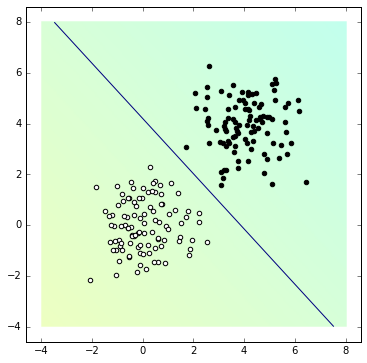

In [37]:
X,Y = numpy.meshgrid(numpy.linspace(-4,8,200),numpy.linspace(-4,8,200))
test = numpy.c_[X.ravel(),Y.ravel(),np.ones((40000,1))]
pred=numpy.dot(test,w)

rp=pred.reshape(200,200)
plt.scatter(datos[:100,0],datos[:100,1],c=[1,1,1])
plt.scatter(datos[100:,0],datos[100:,1],c=[0,0,0])
plt.imshow(rp, interpolation='bilinear', origin='lower', extent=(-4,8,-4,8),alpha=0.3, vmin=-15, vmax=15)
plt.contour(X,Y,rp,[0], linestyle='dashed')
plt.gcf().set_size_inches((6,6))

Vemos como ahora si que se soluciona el problema.